In [25]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import camb
from camb import model, initialpower
from camb.sources import GaussianSourceWindow, SplinedSourceWindow
import numpy as np
import sympy as sy
from sympy import symbols
from scipy import interpolate
from scipy import optimize
from scipy import integrate
import matplotlib
from matplotlib import pyplot as plt

In [32]:
z = np.arange(0.7,2.1,0.1)
n = np.array([17.5,19,18,16,15,13.2,12,10,7.5,5.5,3.5,3.2,2,1])
for i in range (len(z)):
    z[i]= (round(z[i],1))

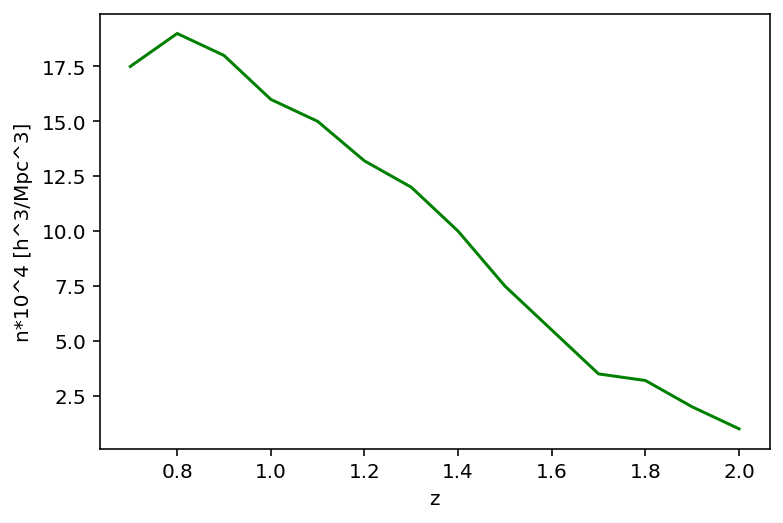

In [33]:
it, ax = plt.subplots()

ax.set_xlabel('z')
ax.set_ylabel('n*10^4 [h^3/Mpc^3]')

ax.plot(z, n, color='g', ls ='-')  #aggiungi gli errori


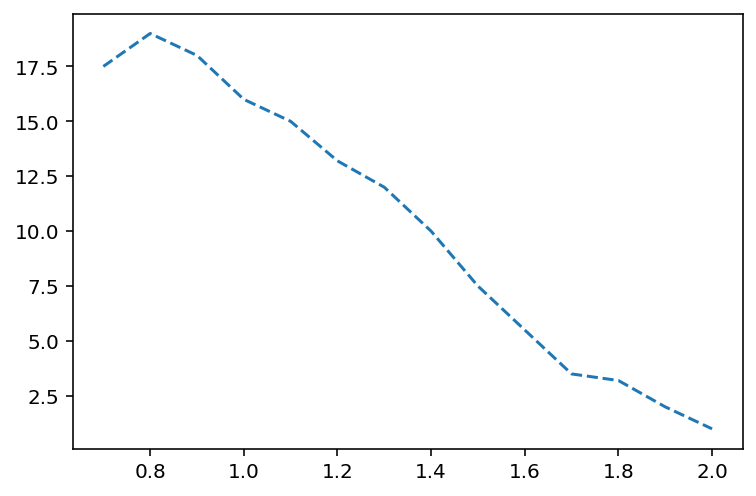

In [34]:
ng =  interpolate.interp1d(z,n,kind='cubic')
plt.plot(z, ng(z), '--')

In [35]:
def Ng(z):
    return ng(z)

In [26]:

def dNdz(x):
    z = np.array([1,1.2,1.4,1.6])
    dN = np.array([1815,1701.5,1410.0,940.97])
    #dN = dN/(3.046*1.e-4)*4*np.pi

    for i in range (len(z)):
        z[i]= (round(z[i],2))
    dn =  interpolate.interp1d(z,dN,kind='cubic',fill_value = "extrapolate")
    y = float(dn(x))
    return y;


In [27]:
dNdz(1)

1815.0

In [28]:
def dist(z):   #funzione per trasformare il redshift in distanza
    return results.comoving_radial_distance(z) #coefficiente per trasformare il redshift in un raggio, c/H0 = [km/s  / (km/s)/Mpc] = [Mpc], z è adimensionale


In [30]:
zetas= np.array([1,1.2,1.4,1.6])
DeltaZ = np.array([0.05,0.1,0.2,0.3,0.5]) 
dNdz= np.empty(500)



ng = np.empty((len(zetas),len(DeltaZ)))

for i in range (len(zetas)):
   for j in range(len(DeltaZ)):
      start = z[i]-DeltaZ[j]/2
      stop = z[i]+DeltaZ[j]/2
      x = np.linspace(start,stop, 500)

      for k in range (len(x)):
         dNdz[k] = dNdz(x[k])*H(x[k])/dist(x[k])**2
         ng[i][j]= integrate.trapezoid(dNdz,x)

#plt.plot(x,dNdz)
ng


TypeError: 'numpy.ndarray' object is not callable